In [1]:
library(Matrix)
source("senet.R")
source("utils.R")

In [4]:
ctr=list(lambda1=1000, lambda2=1000,muy=1, stepsize="fixed",lx="1d",ly="1d", 
         L = 1, use.gram = TRUE, maxiter = 2000, tol = 1e-5, init = NULL, sigma = 0.9)
c1=list(n=200,n_test=100,px=20,py=20,noise.signal=0.5,noise.response=sqrt(5),dataseed=1,typeb="onebump",typeB="circ",typeX="5signal")

Parameter muy =  0 ...
Parameter muy =  0.5 ...
Parameter muy =  1 ...


Loading required namespace: Cairo
Loading required namespace: Cairo


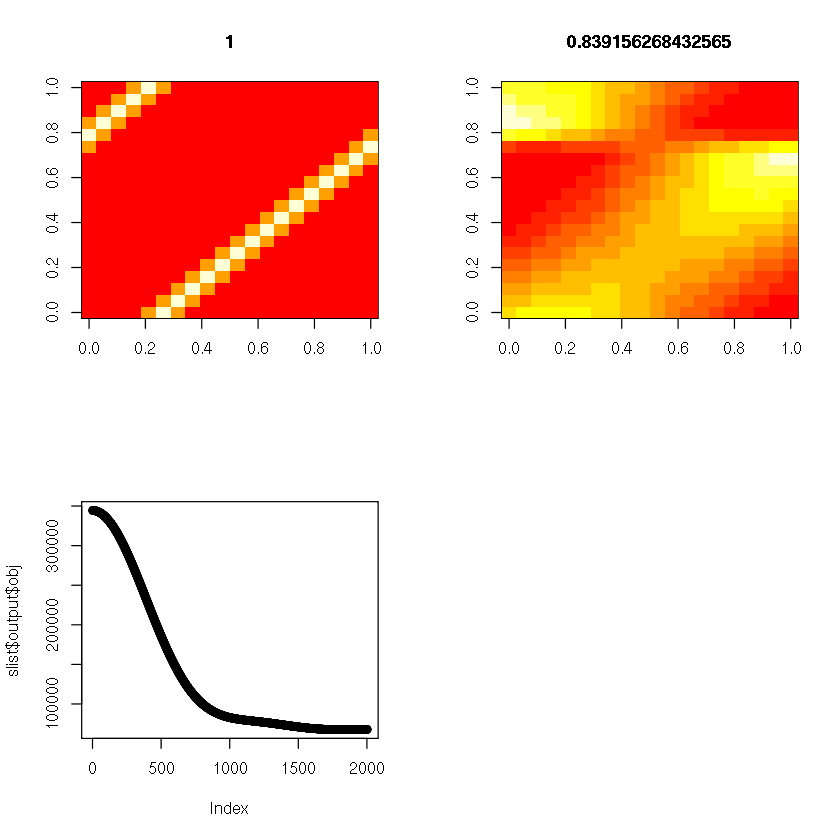

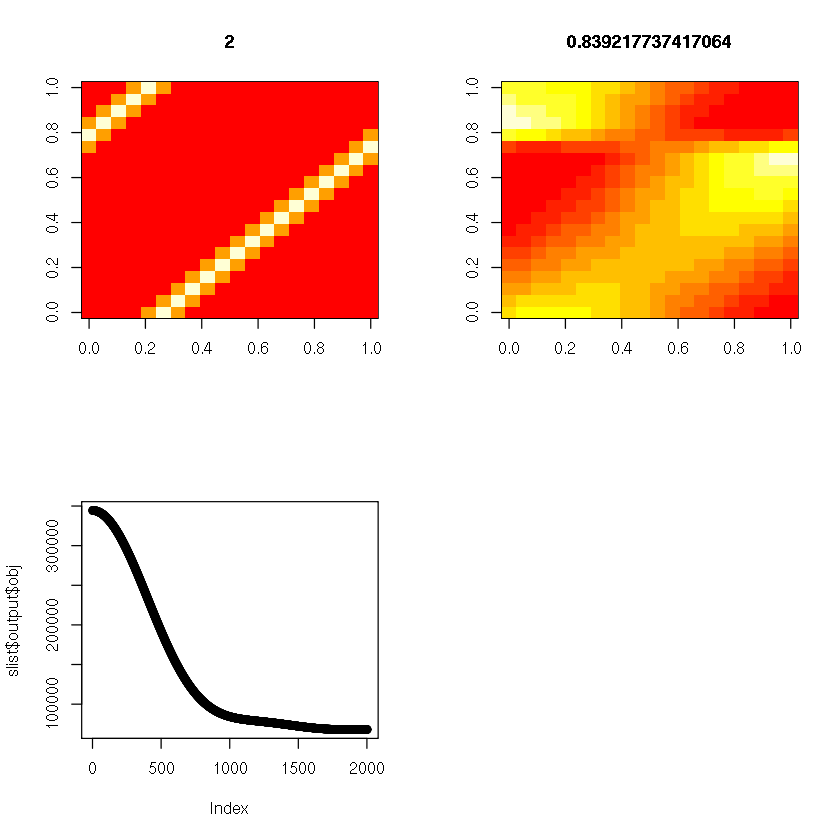

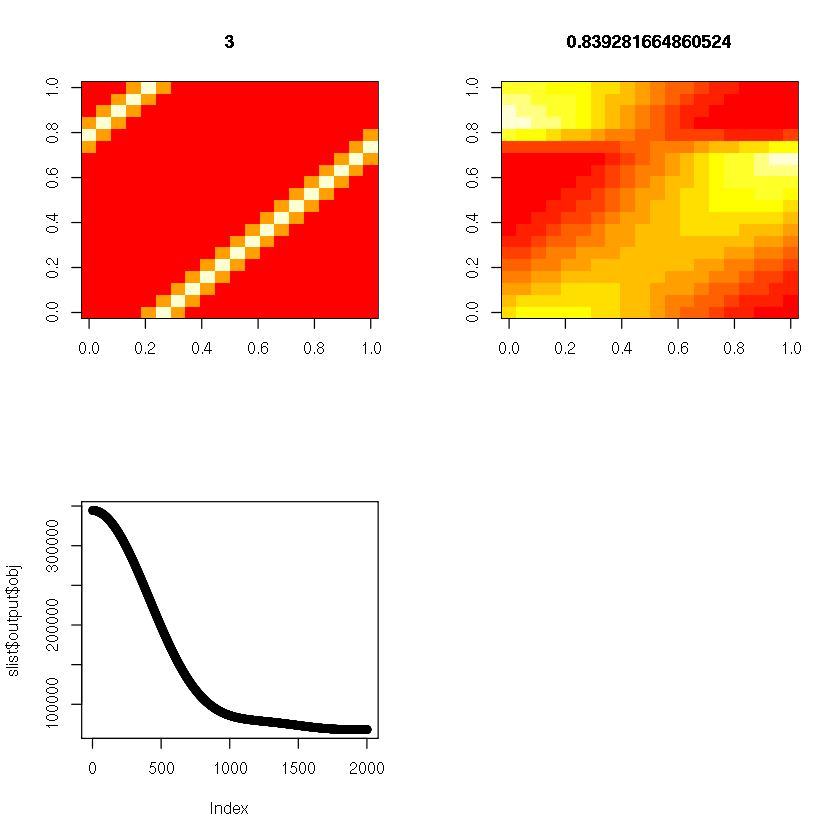

In [5]:
# generate data
data=getDataSim(n=c1$n,n_test=c1$n_test,px=c1$px,py=c1$py,noise.signal=c1$noise.signal,noise.response=c1$noise.response,
                dataseed=c1$dataseed,typeb=c1$typeb,typeB=c1$typeB,typeX=c1$typeX)
MUY=c(0,0.5,1)
for(i in 1:length(MUY)){
    cat("Parameter muy = ", MUY[i], "...\n")
    # update parameter
    ctr$muy=MUY[i]
    # run algo
    res=msnet_fista(data,control=ctr,jobid=i)
    # load result
    fname=paste0("n",c1$n,"px",c1$px,"py",c1$py,"job",i,".RData")
    load(fname)
    rele=base::norm(slist$input$B-slist$output$Bhat,"F")/base::norm(slist$input$B,"F")
    # make plot
    par(mfrow=c(2,2))
    image(slist$input$B,main=i)
    image(slist$output$Bhat,main=rele)
    plot(slist$output$obj)
    
}

# After Parallelization

- Parameters and simulation code in **msnet_simu_fun2.R**
- R code for parallelization in **msnet_simu2.R**
- submission code in **submit2.bash** with `sbatch submit2.bash`

In [2]:
library(scatterplot3d)
library(Matrix)

In [9]:
############ Default parameters ############
ctr=list(lambda1=1000, lambda2=1000,muy=1, stepsize="fixed",lx="1d",ly="1d", 
         L = 1, use.gram = TRUE, maxiter = 2000, tol = 1e-5, init = NULL, sigma = 0.9)
c1=list(n=200,n_test=100,px=20,py=20,noise.signal=0.5,noise.response=sqrt(5),dataseed=1,typeb="onebump",typeB="circ",typeX="5signal")

#l1s=c(0,1,10,100,1000,10000)
#l2s=c(0,1,10,100,1000,10000)
l1s=1000
l2s=1000
lys=c(0,0.5,1) #(0:10)/10 #
ns= (1:10)*100 #c(200,400,600) 

df=NULL
for(i1 in 1:length(l1s)){
  for(i2 in 1:length(l2s)){
      for(i3 in 1:length(lys)){
          for(i4 in 1:length(ns)){
               df=rbind(df,c(i1,i2,i3,i4,l1s[i1],l2s[i2],lys[i3],ns[i4]))
          }
      }
  }
}
colnames(df)=c("id1","id2","id3","id4","lambda1","lambda2","lambdaly","n")
save(ctr,c1,df,file = "./results/df.RData")

In [13]:
ns= (1:5)*100

In [17]:
load("./results/df.RData")
resm=matrix(0,nrow(df),2)
for(jobid in 1:nrow(df)){
 #fname=paste0("./results/px50py10beta_lag_3_one_bump_cor_ly/n",df[jobid,"n"],"px",paras$px,"py",paras$py,"job",jobid,"T","beta_lag_3_one_bump_cor")
 fname=paste0("./results/n",df[jobid,"n"],"px",c1$px,"py",c1$py,"job",jobid)
 load(paste0(fname,".RData"))
 resm[jobid,1]=base::norm(slist$input$B-slist$output$Bhat,"F")#/base::norm(slist$input$B,"F")
 resm[jobid,2]=slist$output$rmse_test   
}
df=cbind(df,resm)
colnames(df)=c("id1","id2","id3","id4","lambda1","lambda2","lambdaly","n","coef_error","pred_rmse_test")

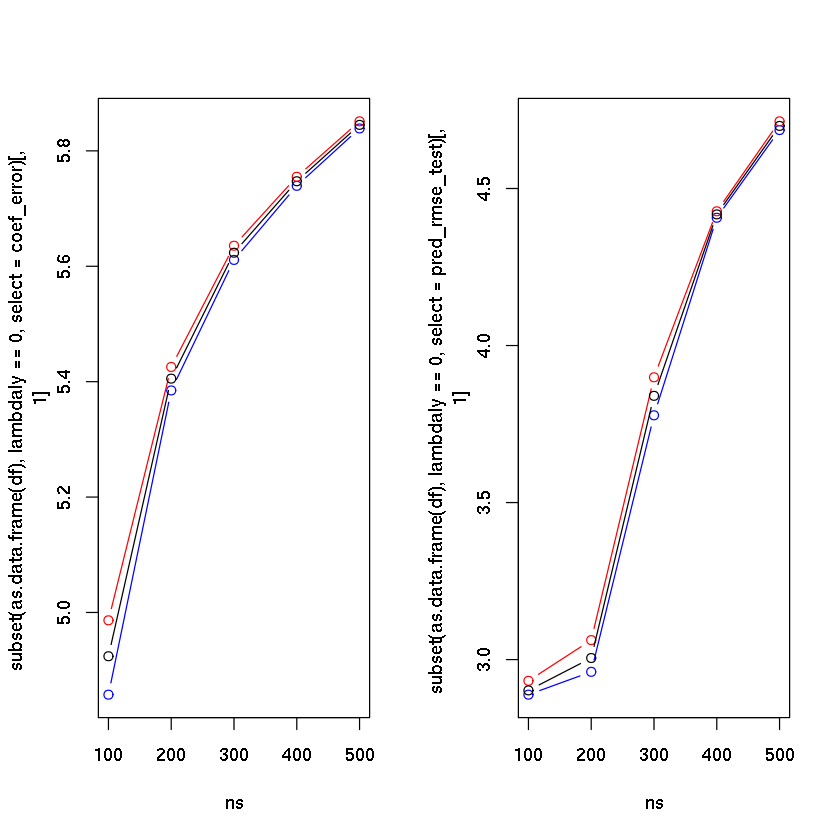

In [18]:
par(mfrow=c(1,2))
plot(ns,subset(as.data.frame(df),lambdaly==0,select=coef_error)[,1],col="blue",type="b",ylim=c(min(df[,"coef_error"]),max(df[,"coef_error"])))
points(ns,subset(as.data.frame(df),lambdaly==1,select=coef_error)[,1],col="red",type="b")
points(ns,subset(as.data.frame(df),lambdaly==0.5,select=coef_error)[,1],type="b")

plot(ns,subset(as.data.frame(df),lambdaly==0,select=pred_rmse_test)[,1],col="blue",type="b",ylim=c(min(df[,"pred_rmse_test"]),max(df[,"pred_rmse_test"])))
points(ns,subset(as.data.frame(df),lambdaly==1,select=pred_rmse_test)[,1],col="red",type="b")
points(ns,subset(as.data.frame(df),lambdaly==0.5,select=pred_rmse_test)[,1],type="b")

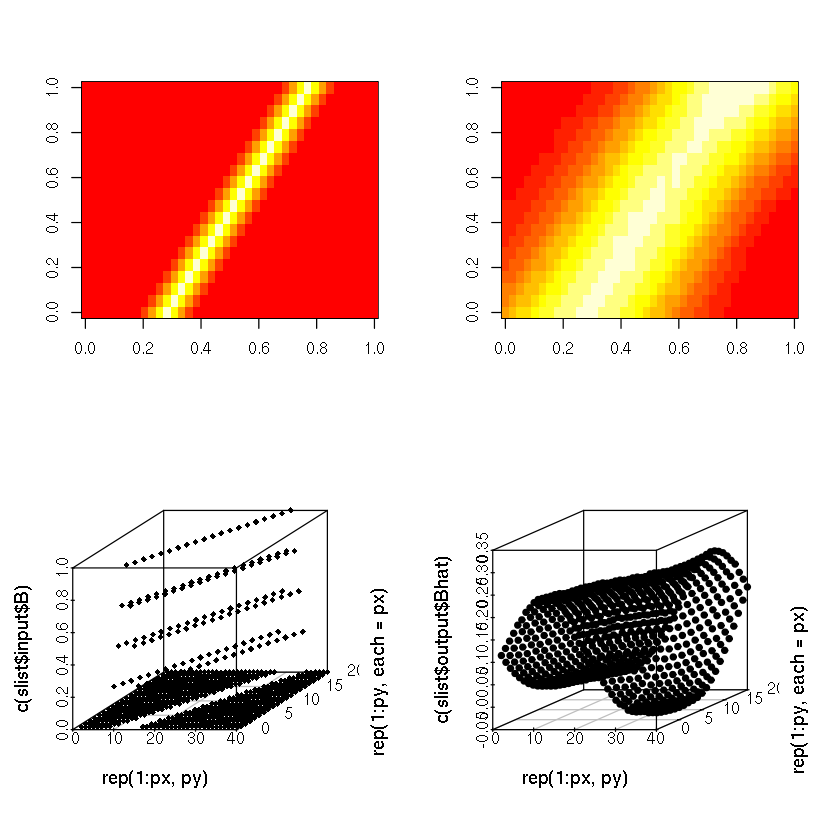

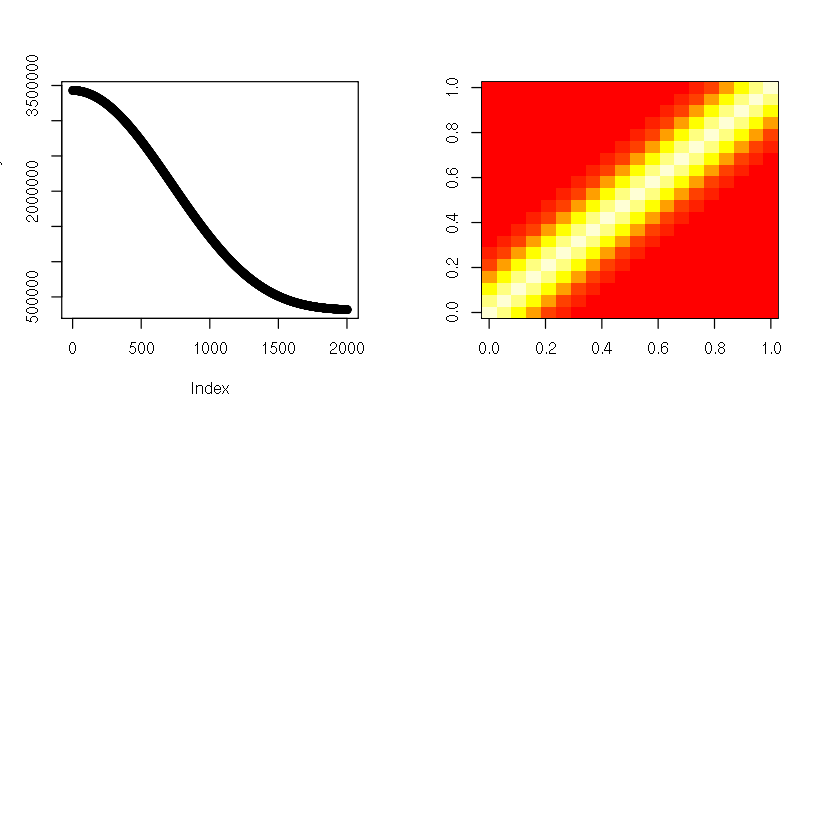

In [19]:
load("./results/n500px40py20job5.RData")
px=c1$px
py=c1$py
#image(cor(t(slist$input$B)))
par(mfrow=c(2,2))
image(slist$input$B)
#image(as(slist$input$B, "dgCMatrix"))
image(slist$output$Bhat)
scatterplot3d(rep(1:px,py),rep(1:py,each=px),c(slist$input$B),pch=18)
scatterplot3d(rep(1:px,py),rep(1:py,each=px),c(slist$output$Bhat),pch=19)
plot(slist$fit$obj)
image(cor(slist$input$B))

In [20]:
df

id1,id2,id3,id4,lambda1,lambda2,lambdaly,n,coef_error,pred_rmse_test
1,1,1,1,1000,1000,0.0,100,4.857547,2.888331
1,1,1,2,1000,1000,0.0,200,5.384812,2.961067
1,1,1,3,1000,1000,0.0,300,5.611010,3.777829
1,1,1,4,1000,1000,0.0,400,5.739437,4.406891
1,1,1,5,1000,1000,0.0,500,5.838857,4.686093
1,1,2,1,1000,1000,0.5,100,4.924137,2.901926
1,1,2,2,1000,1000,0.5,200,5.405268,3.005018
1,1,2,3,1000,1000,0.5,300,5.623468,3.839845
1,1,2,4,1000,1000,0.5,400,5.747336,4.417620
1,1,2,5,1000,1000,0.5,500,5.845029,4.699282
